In [48]:
#####
## Importo mis propias funciones forzando a que se renueven en cada carga 
import constantes as const
import funciones_auxiliares as F
%load_ext autoreload
%autoreload 2
#####
## Importo paquetes
import numpy as np
from math import pi
import matplotlib.pyplot as plt
# Para tener el estilo correcto
from matplotlib import style

style.use('default')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


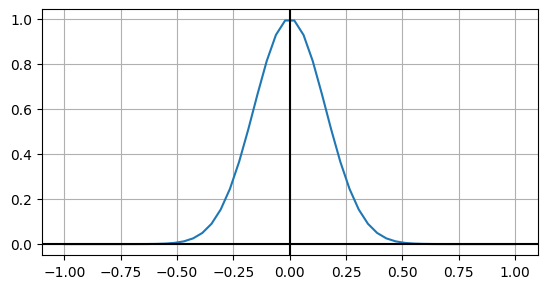

In [44]:
x = np.linspace(-1, 1)
y = F.exp_vec(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_aspect('equal')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

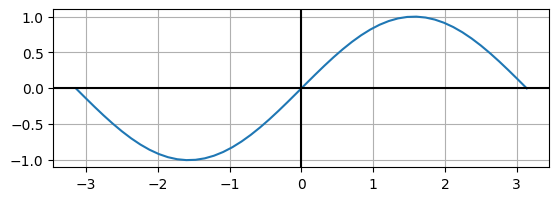

In [50]:
x = np.linspace(-pi, pi)
y = F.sin_vec(x)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_aspect('equal')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')


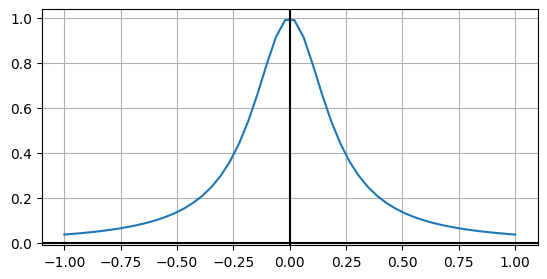

In [49]:
x = np.linspace(-1, 1)
y = F.runge_vec(x)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_aspect('equal')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')